# Obtendo os grafos de co-relação

In [139]:
!pip install networkx
!pip install pandas
!pip install matplotlib

In [140]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

In [141]:
# Create functions for suport 

def create_graph(dataframe):
    """
        função para criar o grafo de co-autoria

        args:
            - dataframe: 
            
        return:
            - graph: 
    """
    graph = nx.Graph()

    for index, row in dataframe.iterrows():
        autores = row["Authors"].split(";")
        for autor in autores:
            # criando os nós do grafo sobre a ods_1
            graph.add_node(autor)
    
        for i, autor1 in enumerate(autores):
            for j, autor2 in enumerate(autores):
                if j != i:
                    graph.add_edge(autor1,autor2)
        
    return graph

def plot_graph(graph, mode="spring"):
    """
    
    """
    # Plotando o grafo com um layout diferente
    plt.figure(figsize=(12, 10))
    
    # Experimente diferentes layouts: spring_layout, circular_layout, kamada_kawai_layout
    if mode == "spring":
        pos = nx.spring_layout(graph, k=0.1)  # Ajuste o parâmetro 'k' conforme necessário
    elif mode == "circular":
        pos = nx.circular_layout(graph)
    elif mode == "kamada":
        pos = nx.kamada_kawai_layout(graph)
    
    # Ajustando estilos
    nx.draw(graph, pos, with_labels=False, node_size=50, node_color="skyblue", font_size=8, font_weight="bold", edge_color="gray", width=1, alpha=1)
    plt.title("Grafo de Autores")
    plt.show()

def plot_assortatividade(graph):
   pass

## GRAFO ODS 1 - Erradicação da Pobreza

Number of nodes: 432
Number of edges: 1622


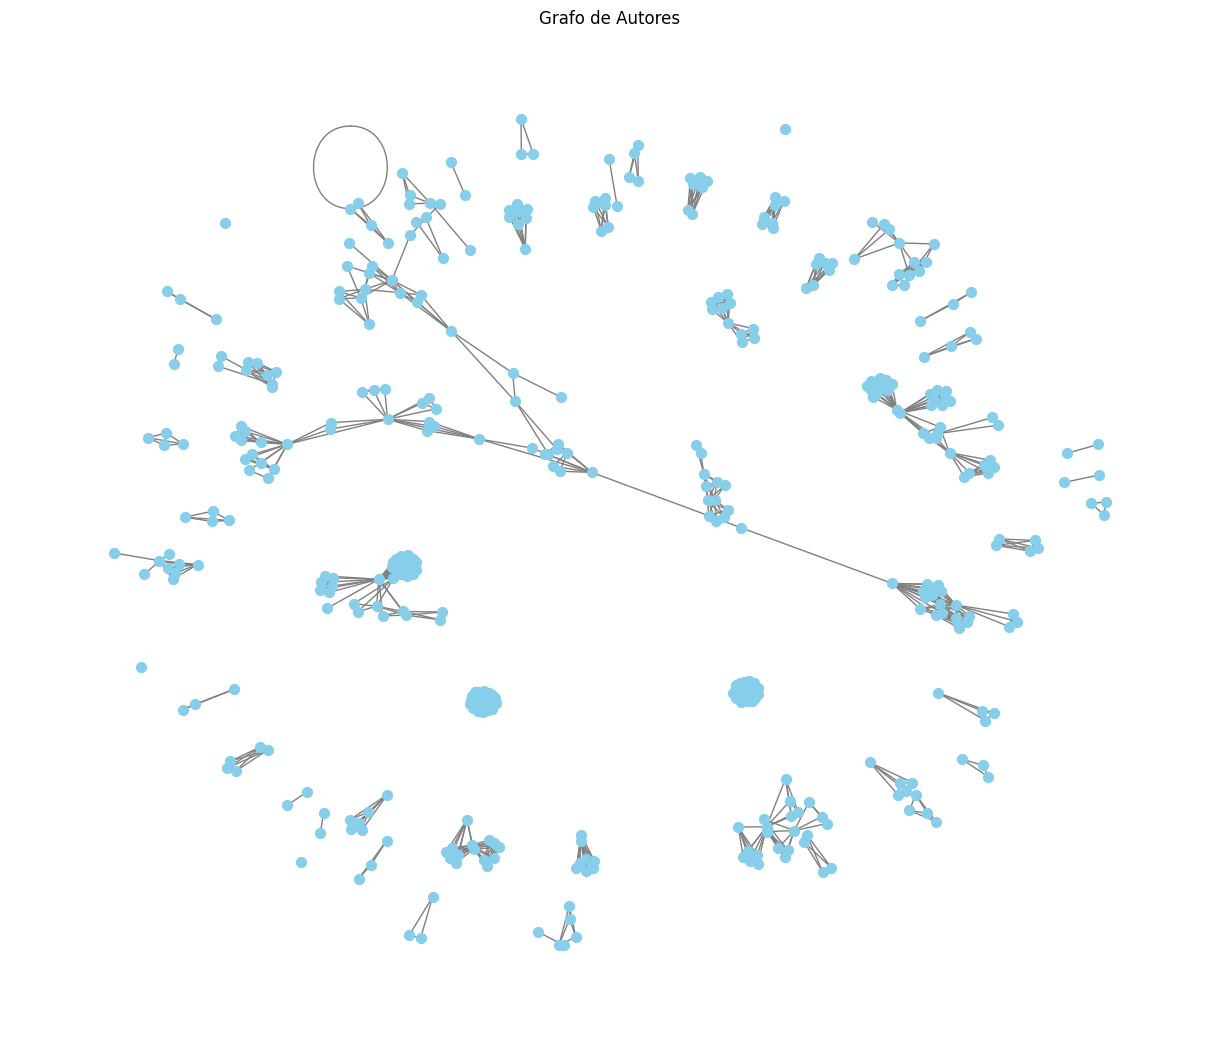

In [142]:
# obtendo o dataframe da ods_1
data_frame1 = pd.read_csv('../datasets/ods_1.csv')

# criando o grafo da ods_1
ods1_graph = create_graph(data_frame1)
        
# printando o numero de nós e links do grafo
print(f"Number of nodes: {ods1_graph.number_of_nodes()}")
print(f"Number of edges: {ods1_graph.number_of_edges()}")

# plotando o grafo
plot_graph(ods1_graph)

## GRAFO ODS 2 - Fome Zero e Agricultura Sustentável

Number of nodes: 1869
Number of edges: 45126


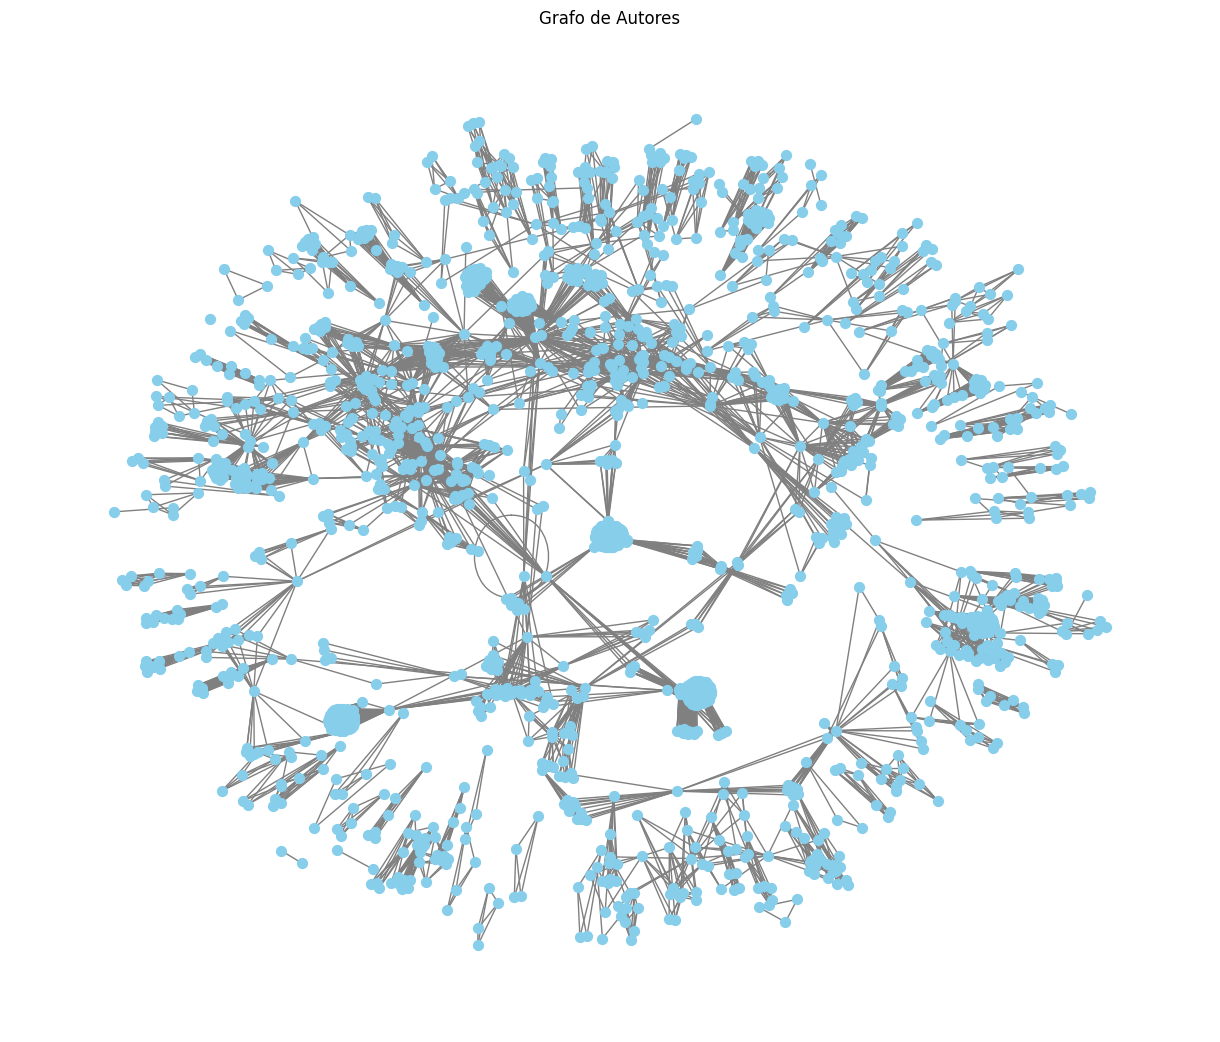

In [143]:
# obtendo o dataframe da ods_1
data_frame2 = pd.read_csv('../datasets/ods_2.csv')

# criando o grafo da ods_1
ods2_graph = create_graph(data_frame2)
        
# printando o numero de nós e links do grafo
print(f"Number of nodes: {ods2_graph.number_of_nodes()}")
print(f"Number of edges: {ods2_graph.number_of_edges()}")

# plotando o grafo
plot_graph(ods2_graph)

## GRAFO ODS 9: Indústria, Inovação e Infraestrutura

Number of nodes: 1825
Number of edges: 6119


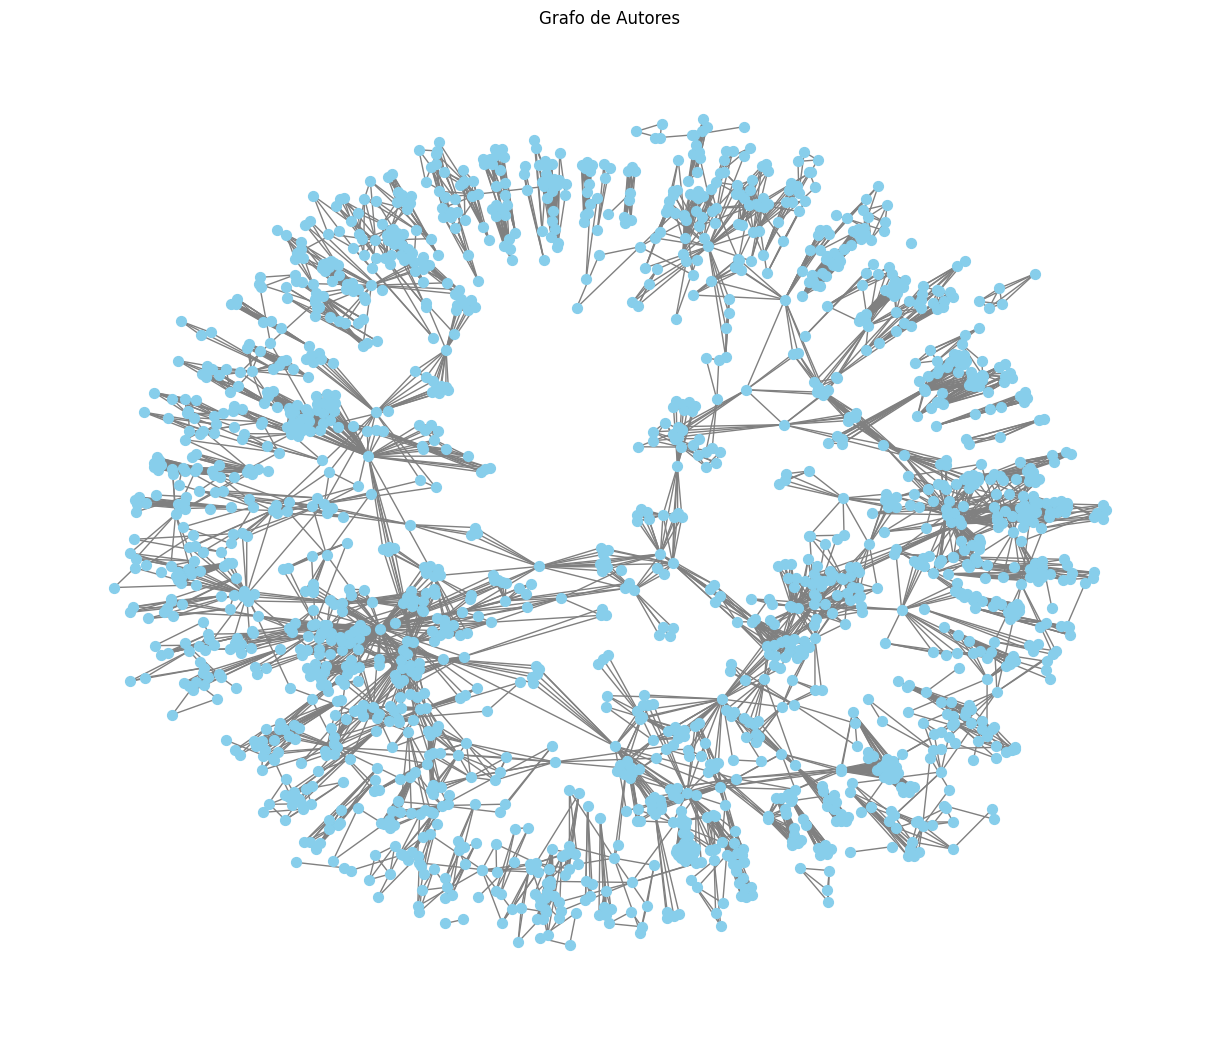

In [144]:
# obtendo o dataframe da ods_1
data_frame9 = pd.read_csv('../datasets/ods_9.csv')

# criando o grafo da ods_1
ods9_graph = create_graph(data_frame9)
        
# printando o numero de nós e links do grafo
print(f"Number of nodes: {ods9_graph.number_of_nodes()}")
print(f"Number of edges: {ods9_graph.number_of_edges()}")

# plotando o grafo
plot_graph(ods9_graph)

## GRAFO ODS 11: Cidades e Comunidades Sustentáveis

Number of nodes: 2095
Number of edges: 39679


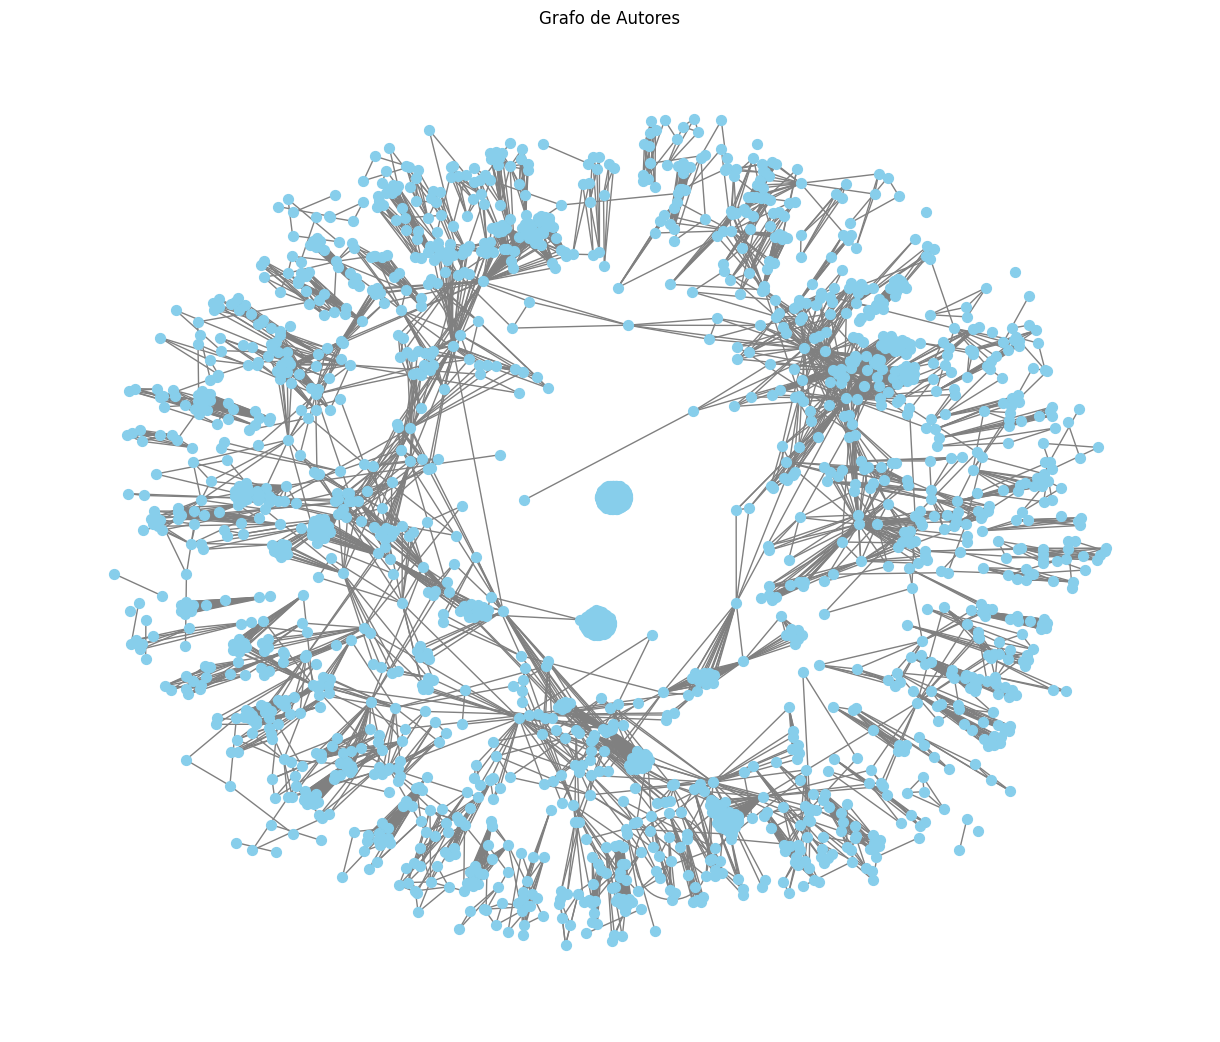

In [145]:
# obtendo o dataframe da ods_1
data_frame11 = pd.read_csv('../datasets/ods_11.csv')

# criando o grafo da ods_1
ods11_graph = create_graph(data_frame11)
        
# printando o numero de nós e links do grafo
print(f"Number of nodes: {ods11_graph.number_of_nodes()}")
print(f"Number of edges: {ods11_graph.number_of_edges()}")

# plotando o grafo
plot_graph(ods11_graph)